In [22]:
from autocluster import AutoCluster
from algorithms import algorithms
from build_config_space import build_config_space
from utils.clusterutils import ClusterUtils
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score,\
v_measure_score, homogeneity_score, completeness_score
from sklearn import datasets
import csv

import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
varied, blobs, no_structure, noisy_circles, noisy_moons, aniso = ClusterUtils.generate_sample_data(1500)

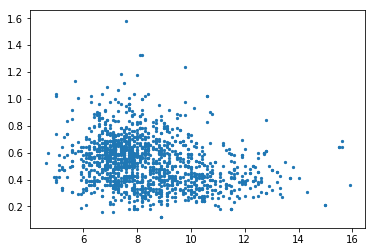

(1599, 11)
[[7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00]
 [7.800e+00 8.800e-01 0.000e+00 2.600e+00 9.800e-02 2.500e+01 6.700e+01
  9.968e-01 3.200e+00 6.800e-01 9.800e+00]
 [7.800e+00 7.600e-01 4.000e-02 2.300e+00 9.200e-02 1.500e+01 5.400e+01
  9.970e-01 3.260e+00 6.500e-01 9.800e+00]
 [1.120e+01 2.800e-01 5.600e-01 1.900e+00 7.500e-02 1.700e+01 6.000e+01
  9.980e-01 3.160e+00 5.800e-01 9.800e+00]
 [7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00]]


In [6]:
with open('../data/winequality_red.csv', 'r') as f:
    reader = csv.reader(f)
    wine_quality_dataset = list(reader)

del wine_quality_dataset[0]
    
wine_quality_dataset_labels = np.array([int(sublist[-1]) for sublist in wine_quality_dataset])
wine_quality_dataset = [[float(numStr) if numStr else 0 for numStr in sublist[:-1]] for sublist in wine_quality_dataset]
wine_quality_dataset = np.array(wine_quality_dataset)

ClusterUtils.visualize_sample_data(wine_quality_dataset)
X = wine_quality_dataset
y_true = wine_quality_dataset_labels
print(wine_quality_dataset.shape)
print(wine_quality_dataset[:5])

### Test with Parallel Runs : Using silhouette_score as Evaluator

In [25]:
autocluster = AutoCluster()
smac_obj, opt_result = autocluster.fit(X, cluster_alg_ls=['GaussianMixture'], 
                                       dim_reduction_alg_ls=[],
                                       n_evaluations=50, seed=27, run_obj='quality', cutoff_time=10, 
                                       shared_model=True, n_parallel_runs = 3,
                                       evaluator=lambda X, y_pred: float('inf') if len(set(y_pred)) == 1 \
                                                else -1 * silhouette_score(X, y_pred)  
#                                                    else davies_bouldin_score(X, y_pred)
                                      )

Configuration space object:
  Hyperparameters:
    clustering_choice, Type: Categorical, Choices: {GaussianMixture}, Default: GaussianMixture
    covariance_type___GaussianMixture, Type: Categorical, Choices: {full, tied, diag, spherical}, Default: full
    init_params___GaussianMixture, Type: Categorical, Choices: {kmeans, random}, Default: kmeans
    n_components___GaussianMixture, Type: UniformInteger, Range: [1, 30], Default: 5
    random_state___GaussianMixture, Type: UniformInteger, Range: [0, 9], Default: 0
    warm_start___GaussianMixture, Type: Categorical, Choices: {True, False}, Default: False
  Conditions:
    covariance_type___GaussianMixture | clustering_choice in {'GaussianMixture'}
    init_params___GaussianMixture | clustering_choice in {'GaussianMixture'}
    n_components___GaussianMixture | clustering_choice in {'GaussianMixture'}
    random_state___GaussianMixture | clustering_choice in {'GaussianMixture'}
    warm_start___GaussianMixture | clustering_choice in {'Ga

Fitting configuration: {'init_params___GaussianMixture': 'random', 'covariance_type___GaussianMixture': 'spherical', 'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 18, 'random_state___GaussianMixture': 4}
Fitting configuration: {'warm_start___GaussianMixture': True, 'covariance_type___GaussianMixture': 'diag', 'init_params___GaussianMixture': 'kmeans', 'n_components___GaussianMixture': 2, 'clustering_choice': 'GaussianMixture', 'random_state___GaussianMixture': 7}
Fitting configuration: {'init_params___GaussianMixture': 'random', 'covariance_type___GaussianMixture': 'spherical', 'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 15, 'random_state___GaussianMixture': 9}
Fitting configuration: {'init_params___GaussianMixture': 'kmeans', 'covariance_type___GaussianMixture': 'spherical', 'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 6, 'random_state___GaussianMixture': 9}
Fitting configuration: {'warm_start___Gau

In [26]:
opt_result

Configuration:
  clustering_choice, Value: 'GaussianMixture'
  covariance_type___GaussianMixture, Value: 'diag'
  init_params___GaussianMixture, Value: 'kmeans'
  n_components___GaussianMixture, Value: 2
  random_state___GaussianMixture, Value: 7
  warm_start___GaussianMixture, Value: True

performing TSNE


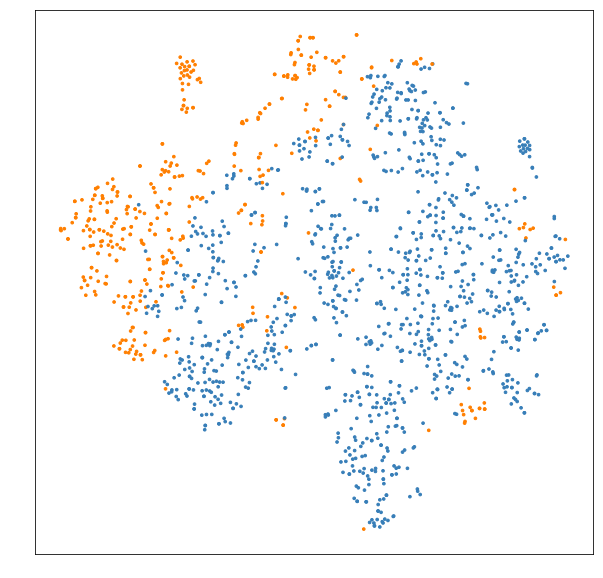

array([0, 1])

In [27]:
predictions = autocluster.predict(X)
np.unique(predictions)

In [28]:
smac_obj.get_trajectory()

[TrajEntry(train_perf=2147483648, incumbent_id=1, incumbent=Configuration:
   clustering_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   init_params___GaussianMixture, Value: 'kmeans'
   n_components___GaussianMixture, Value: 5
   random_state___GaussianMixture, Value: 0
   warm_start___GaussianMixture, Value: False
 , ta_runs=0, ta_time_used=0, wallclock_time=0.00025272369384765625),
 TrajEntry(train_perf=-0.08127009116146852, incumbent_id=1, incumbent=Configuration:
   clustering_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   init_params___GaussianMixture, Value: 'kmeans'
   n_components___GaussianMixture, Value: 5
   random_state___GaussianMixture, Value: 0
   warm_start___GaussianMixture, Value: False
 , ta_runs=1, ta_time_used=0.428955078125, wallclock_time=0.43854331970214844),
 TrajEntry(train_perf=-0.09227650101200455, incumbent_id=2, incumbent=Configuration:
   clustering_choice, Value: 'GaussianM

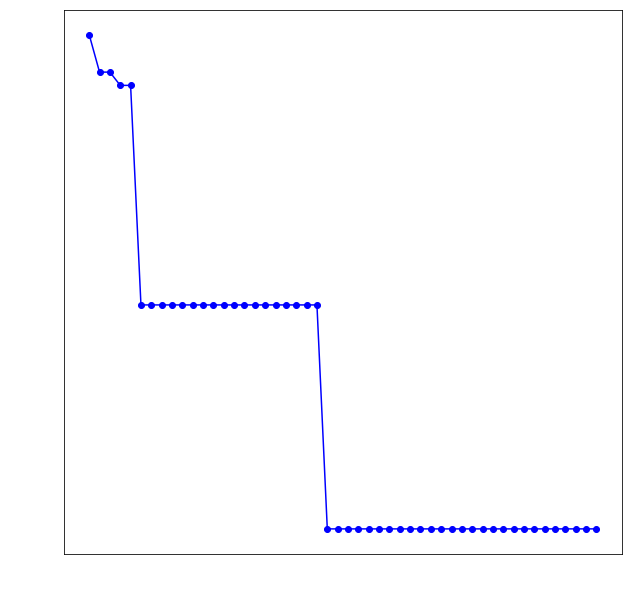

In [29]:
autocluster.plot_convergence()

In [30]:
print(predictions[:100])

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0]


In [31]:
print(y_true[:100])

[5 5 5 6 5 5 5 7 7 5 5 5 5 5 5 5 7 5 4 6 6 5 5 5 6 5 5 5 5 6 5 6 5 6 5 6 6
 7 4 5 5 4 6 5 5 4 5 5 5 5 5 6 6 5 6 5 5 5 5 6 5 5 7 5 5 5 5 5 5 6 6 5 5 4
 5 5 5 6 5 4 5 5 5 5 6 5 6 5 5 5 5 6 5 5 4 6 5 5 5 6]


- v_measure = (1 + beta) * homogeneity * completeness
                 / (beta * homogeneity + completeness)
  when beta = 1(default), v_measure = the harmonic mean

In [32]:
print(v_measure_score(labels_true=y_true, labels_pred=predictions))
print(homogeneity_score(labels_true=y_true, labels_pred=predictions))
print(completeness_score(labels_true=y_true, labels_pred=predictions))

0.008143213495023898
0.006108138472083822
0.012211907881229828


###   

### Test with Parallel Runs : Using v_measure_score as Evaluator(only for test)

In [14]:
autocluster = AutoCluster()
smac_obj, opt_result = autocluster.fit(X, cluster_alg_ls=['GaussianMixture'], 
                                       dim_reduction_alg_ls=[],
                                       n_evaluations=50, seed=27, run_obj='quality', cutoff_time=10, 
                                       shared_model=True, n_parallel_runs = 3,
                                       evaluator=lambda X, y_pred: float('inf') if len(set(y_pred)) == 1 \
                                                #else -1 * silhouette_score(X, y_pred)  
#                                                    else davies_bouldin_score(X, y_pred)
                                               else -1 * v_measure_score(labels_true=y_true, \
                                                                    labels_pred=y_pred)
                                      )

Configuration space object:
  Hyperparameters:
    clustering_choice, Type: Categorical, Choices: {GaussianMixture}, Default: GaussianMixture
    covariance_type___GaussianMixture, Type: Categorical, Choices: {full, tied, diag, spherical}, Default: full
    init_params___GaussianMixture, Type: Categorical, Choices: {kmeans, random}, Default: kmeans
    n_components___GaussianMixture, Type: UniformInteger, Range: [1, 30], Default: 5
    random_state___GaussianMixture, Type: UniformInteger, Range: [0, 9], Default: 0
    warm_start___GaussianMixture, Type: Categorical, Choices: {True, False}, Default: False
  Conditions:
    covariance_type___GaussianMixture | clustering_choice in {'GaussianMixture'}
    init_params___GaussianMixture | clustering_choice in {'GaussianMixture'}
    n_components___GaussianMixture | clustering_choice in {'GaussianMixture'}
    random_state___GaussianMixture | clustering_choice in {'GaussianMixture'}
    warm_start___GaussianMixture | clustering_choice in {'Ga

Fitting configuration: {'init_params___GaussianMixture': 'kmeans', 'covariance_type___GaussianMixture': 'full', 'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 13, 'random_state___GaussianMixture': 8}
Fitting configuration: {'warm_start___GaussianMixture': True, 'covariance_type___GaussianMixture': 'full', 'init_params___GaussianMixture': 'kmeans', 'n_components___GaussianMixture': 14, 'clustering_choice': 'GaussianMixture', 'random_state___GaussianMixture': 8}
Fitting configuration: {'init_params___GaussianMixture': 'kmeans', 'covariance_type___GaussianMixture': 'spherical', 'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 7}
Fitting configuration: {'warm_start___GaussianMixture': True, 'covariance_type___GaussianMixture': 'tied', 'init_params___GaussianMixture': 'kmeans', 'n_components___GaussianMixture': 29, 'clustering_choice': 'GaussianMixture', 'random_state___GaussianMixture': 9}
Fitting configuration: {'warm_start___GaussianMix

In [15]:
opt_result

Configuration:
  clustering_choice, Value: 'GaussianMixture'
  covariance_type___GaussianMixture, Value: 'tied'
  init_params___GaussianMixture, Value: 'kmeans'
  n_components___GaussianMixture, Value: 3
  random_state___GaussianMixture, Value: 2
  warm_start___GaussianMixture, Value: True

performing TSNE


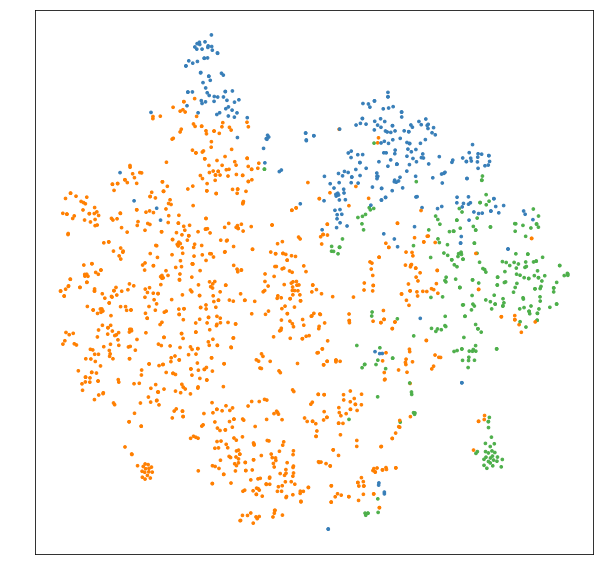

array([0, 1, 2])

In [16]:
predictions = autocluster.predict(X)
np.unique(predictions)

In [17]:
smac_obj.get_trajectory()

[TrajEntry(train_perf=2147483648, incumbent_id=1, incumbent=Configuration:
   clustering_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   init_params___GaussianMixture, Value: 'kmeans'
   n_components___GaussianMixture, Value: 5
   random_state___GaussianMixture, Value: 0
   warm_start___GaussianMixture, Value: False
 , ta_runs=0, ta_time_used=0, wallclock_time=0.00023126602172851562),
 TrajEntry(train_perf=-0.08436697815351404, incumbent_id=1, incumbent=Configuration:
   clustering_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   init_params___GaussianMixture, Value: 'kmeans'
   n_components___GaussianMixture, Value: 5
   random_state___GaussianMixture, Value: 0
   warm_start___GaussianMixture, Value: False
 , ta_runs=1, ta_time_used=0.31868624687194824, wallclock_time=0.3246886730194092),
 TrajEntry(train_perf=-0.09040914317387559, incumbent_id=2, incumbent=Configuration:
   clustering_choice, Value: 'Gauss

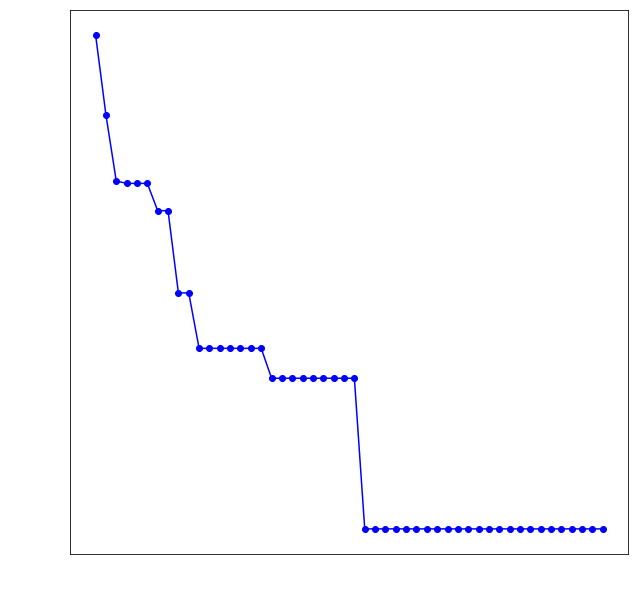

In [18]:
autocluster.plot_convergence()

In [19]:
print(predictions[:100])

<class 'numpy.ndarray'>
(1599,)
[1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 1 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 2 1 1 1 1 1 1 2 1 2 1 1 2 1 2 1 1 2 2 1 1 0 1 1 1 1]


In [20]:
print(y_true[:100])

[5 5 5 6 5 5 5 7 7 5 5 5 5 5 5 5 7 5 4 6 6 5 5 5 6 5 5 5 5 6 5 6 5 6 5 6 6
 7 4 5 5 4 6 5 5 4 5 5 5 5 5 6 6 5 6 5 5 5 5 6 5 5 7 5 5 5 5 5 5 6 6 5 5 4
 5 5 5 6 5 4 5 5 5 5 6 5 6 5 5 5 5 6 5 5 4 6 5 5 5 6]


In [24]:
print(v_measure_score(labels_true=y_true, labels_pred=predictions))
print(homogeneity_score(labels_true=y_true, labels_pred=predictions))
print(completeness_score(labels_true=y_true, labels_pred=predictions))

0.12167819960096876
0.10654464982319932
0.14182261411534905
